In [1]:
from quantum_dataset import QM7, QM7b, QM9, Champs, SuperSet
from quantum_learning import Learn, Selector
from quantum_model import FFNet
from torch.optim import Adam
from torch.nn import MSELoss

RDKit WARNING: [12:59:49] Enabling RDKit 2019.09.3 jupyter extensions


In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss, 
      batch_size=32, epochs=10, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=True, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23+13, 'H': 4096, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'target': 'E', 
             'features': ['alpha_p','alpha_s','HOMO_g','HOMO_p','HOMO_z','LUMO_g',
                          'LUMO_p','LUMO_z','IP','EA','E1','Emax','Imax']}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7b, Model=FFNet, Sampler=Selector, 
      Optimizer=Adam, Criterion=MSELoss, batch_size=32, epochs=10, 
      opt_params=opt_params, model_params=model_params, ds_params=ds_params, 
      crit_params=crit_params, save_model=True, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+14, 'H': 2048, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 133885, 
             'features': ['coulomb','A','B','C','alpha','homo','lumo',
                          'gap','r2','zpve','U0','U','H','G','Cv'], 
             'target': 'mu',
             'dim': 29*29,
             'use_pickle': True}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM9, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=32, epochs=2, model_params=model_params, ds_params=ds_params, 
      opt_params=opt_params, crit_params=crit_params, save_model=True, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 198+3, 'H': 512, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 4658146, 
             'features': ['mulliken_charge_x','mulliken_charge_y','potential_energy'],
             'use_h5': True,  
             'infer': False}
crit_params = {'reduction': 'sum'}

Learn(Dataset=Champs, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=1024, epochs=10, model_params=model_params, ds_params=ds_params, 
      opt_params=opt_params, crit_params=crit_params, save_model=True, load_model=False)

creating Champs h5 dataset...
loading QM9 datadic from a pickled copy...
<class 'quantum_dataset.SuperSet'> dataset created...
epoch: 0 of 10, train loss: 38.778251724538066, val loss: 54.777252162441414
epoch: 1 of 10, train loss: 28.478124878192027, val loss: 51.59603672255513
epoch: 2 of 10, train loss: 25.92895111262291, val loss: 50.892124706559834
epoch: 3 of 10, train loss: 24.298562585236258, val loss: 47.861728446785484
epoch: 4 of 10, train loss: 23.178803482713924, val loss: 48.92674271471763
epoch: 5 of 10, train loss: 22.487957812272388, val loss: 47.70393143473626
epoch: 6 of 10, train loss: 21.9117488372446, val loss: 49.381675190731904
epoch: 7 of 10, train loss: 21.33547475089988, val loss: 53.98095982695831
epoch: 8 of 10, train loss: 20.936996556718103, val loss: 50.90938162187322
epoch: 9 of 10, train loss: 20.532745684903656, val loss: 47.781242942030765
test loss: 19.38435710052207


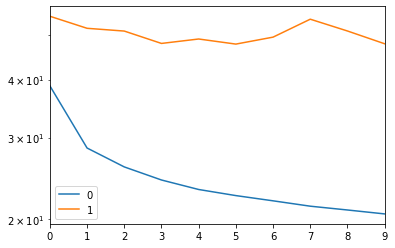

learning time: 2:46:33.010055


In [3]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+15+198+3, 'H': 2048, 'D_out': 1, 'model_name': 'funnel'}
qm9_params = {'n': 133885, 
              'features': ['coulomb','A','B','C','mu','alpha','homo','lumo', 
                           'gap','r2','zpve','U0','U','H','G','Cv'],  
              'dim': 29*29, 
              'use_pickle': True}
champs_params = {'n': 4658146, 
                 'features': ['mulliken_charge_x','mulliken_charge_y','potential_energy'],
                 'use_h5': True,  
                 'infer': False}
crit_params = {'reduction': 'sum'}

ds_params = {'PrimaryDS': Champs, 'SecondaryDS': QM9, 'p_params': champs_params, 's_params': qm9_params}

Learn(Dataset=SuperSet, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=32, epochs=10, model_params=model_params, ds_params=ds_params,
      opt_params=opt_params, crit_params=crit_params, save_model=True, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+15+198+3, 'H': 2048, 'D_out': 1, 'model_name': 'deep'}
qm9_params = {'n': 133885, 
              'features': ['coulomb','A','B','C','mu','alpha','homo','lumo', 
                           'gap','r2','zpve','U0','U','H','G','Cv'],  
              'dim': 29*29, 
              'use_pickle': True}
champs_params = {'n': 4658146, 
                 'features': ['mulliken_charge_x','mulliken_charge_y','potential_energy'],
                 'use_h5': True,  
                 'infer': False}
crit_params = {'reduction': 'sum'}

ds_params = {'PrimaryDS': Champs, 'SecondaryDS': QM9, 'p_params': champs_params, 's_params': qm9_params}

Learn(Dataset=SuperSet, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=32, epochs=10, model_params=model_params, ds_params=ds_params,
      opt_params=opt_params, crit_params=crit_params, save_model=True, load_model=False)

creating Champs h5 dataset...
loading QM9 datadic from a pickled copy...
<class 'quantum_dataset.SuperSet'> dataset created...
epoch: 0 of 10, train loss: 47.09627564441505, val loss: 61.14511193535787
epoch: 1 of 10, train loss: 34.41904729297467, val loss: 53.23659489544086
epoch: 2 of 10, train loss: 31.468479054899117, val loss: 52.288401260882864
epoch: 3 of 10, train loss: 29.85787886655953, val loss: 53.20717799145406
epoch: 4 of 10, train loss: 28.671720144212347, val loss: 52.087246576015225
